In [33]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC#SVR도 있다!

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn import metrics, preprocessing
from scipy.ndimage.interpolation import rotate
import re
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer
from wordcloud import WordCloud
warnings.filterwarnings(action='ignore')                  # Turn off the warnings.
%matplotlib inline

In [4]:
df=pd.read_csv(r'..\data\winequality-red.csv', header='infer',encoding='utf-8')

In [5]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [10]:
X = df.drop('quality', axis = 1)
Y = df['quality']

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 123)

Random Forest

In [12]:
n_estimators_grid = np.arange(20, 50,2)
depth_grid = np.arange(1, 10)
min_samples_leaf_grid = np.arange(10,21,2)
parameters = {'n_estimators': n_estimators_grid, 'max_depth': depth_grid, 'min_samples_leaf':min_samples_leaf_grid}
gridCV = GridSearchCV(RandomForestClassifier(), param_grid=parameters, cv=10, n_jobs=-1)
gridCV.fit(X_train, Y_train)
best_n_estim = gridCV.best_params_['n_estimators']
best_depth = gridCV.best_params_['max_depth']
best_min_samples_leaf = gridCV.best_params_['min_samples_leaf']

In [13]:
print("Random Forest best n_estimator : " + str(best_n_estim))
print("Random Forest best max_depth : " + str(best_depth))
print("Random Forest best min_samples_leaf : " + str(best_min_samples_leaf))

Random Forest best n_estimator : 34
Random Forest best max_depth : 9
Random Forest best min_samples_leaf : 10


In [14]:
# 최적화된 예측.
# RF_best = RandomForestClassifier(n_estimators=30,max_depth=best_depth,min_samples_leaf=best_min_samples_leaf,random_state=123)
# RF_best.fit(X_train, Y_train)
RF_best = gridCV.best_estimator_                                    # 교차검증의 결과인 최적의 학습객체 사용.
Y_pred = RF_best.predict(X_test)
print( "Random Forest best accuracy : " + str(np.round(metrics.accuracy_score(Y_test,Y_pred),3)))

Random Forest best accuracy : 0.596


In [28]:
n_estimators_grid = np.arange(100, 300,2)
depth_grid = np.arange(1, 10)
min_samples_leaf_grid = np.arange(10,21,2)
parameters = {'n_estimators': n_estimators_grid, 'max_depth': depth_grid, 'min_samples_leaf':min_samples_leaf_grid}
gridCV = GridSearchCV(RandomForestClassifier(), param_grid=parameters, cv=10, n_jobs=-1)
gridCV.fit(X_train, Y_train)
best_n_estim = gridCV.best_params_['n_estimators']
best_depth = gridCV.best_params_['max_depth']
best_min_samples_leaf = gridCV.best_params_['min_samples_leaf']

In [29]:
print("Random Forest best n_estimator : " + str(best_n_estim))
print("Random Forest best max_depth : " + str(best_depth))
print("Random Forest best min_samples_leaf : " + str(best_min_samples_leaf))

Random Forest best n_estimator : 102
Random Forest best max_depth : 9
Random Forest best min_samples_leaf : 10


In [30]:
# 최적화된 예측.
# RF_best = RandomForestClassifier(n_estimators=30,max_depth=best_depth,min_samples_leaf=best_min_samples_leaf,random_state=123)
# RF_best.fit(X_train, Y_train)
RF_best = gridCV.best_estimator_                                    # 교차검증의 결과인 최적의 학습객체 사용.
Y_pred = RF_best.predict(X_test)
print( "Random Forest best accuracy : " + str(np.round(metrics.accuracy_score(Y_test,Y_pred),3)))

Random Forest best accuracy : 0.61


SVM

In [34]:
#하이퍼파라미터 튜닝!!
C_grid = 0.02*np.arange(1,20) # 오류의 허용 범위를 정해주는 하이퍼파라미터 오류의 허용 범위를 정해주는 하이퍼파라미터
gamma_grid = 0.02*np.arange(1,50)
parameters = {'C': C_grid, 'gamma' : gamma_grid}#,'kernal':['poly','rbf']}
gridCV = GridSearchCV(SVC(kernel='rbf'), parameters, cv=10, n_jobs=-1)
# "n_jobs = -1" means "use all the CPU cores".
#cv=10: k-fold에서 k가 10이다
# kernal은 rbf 쓰는게 좋다.
gridCV.fit(X_train, Y_train)
best_C = gridCV.best_params_['C']
best_gamma = gridCV.best_params_['gamma']

In [35]:
print("SVM best C : " + str(best_C))
print("SVM best gamma : " + str(best_gamma))

SVM best C : 0.38
SVM best gamma : 0.12


In [36]:
# 최적화된 예측.
# SVM_best = SVC(kernel='rbf', C=best_C,gamma=best_gamma)            # 최적의 하이퍼 파라미터를 사용해서 학습객체 재생성.
# SVM_best.fit(X_train, Y_train);
SVM_best = gridCV.best_estimator_                                    # 교차검증의 결과인 최적의 학습객체 사용.
Y_pred = SVM_best.predict(X_test)
print( "SVM best accuracy : " + str(np.round(metrics.accuracy_score(Y_test,Y_pred),3)))

SVM best accuracy : 0.562


AdaBoost

In [15]:
my_max_depth = 9                                               # 고정해 둔다.
my_learn_rate = 0.01                                           # 고정해 둔다.
n_estimators_grid = np.arange(50, 81, 2)
parameters = {'n_estimators': n_estimators_grid}
AB = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=my_max_depth), learning_rate=my_learn_rate)
#Instantiate an estimator.
gridCV = GridSearchCV(AB, param_grid=parameters, cv=10, n_jobs = -1)
gridCV.fit(X_train, Y_train)
best_n_estim = gridCV.best_params_['n_estimators']

In [16]:
print("AdaBoost best n estimator : " + str(best_n_estim))

AdaBoost best n estimator : 76


In [17]:
# 최적화된 예측.
# AB_best = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=my_max_depth),n_estimators=best_n_estim,
#learning_rate=my_learn_rate,random_state=123)
# AB_best.fit(X_train, Y_train)
AB_best = gridCV.best_estimator_                                    # 교차검증의 결과인 최적의 학습객체 사용.
Y_pred = AB_best.predict(X_test)
print( "AdaBoost best accuracy : " + str(np.round(metrics.accuracy_score(Y_test,Y_pred),3)))

AdaBoost best accuracy : 0.64


xg boost

In [18]:
#xg boost
my_max_depth = 4                                               # 고정해 둔다.
my_learn_rate = 0.1                                           # 고정해 둔다.
n_estimators_grid = np.arange(300, 601, 100)
parameters = {'n_estimators': n_estimators_grid}
XGBC = XGBClassifier(max_depth=my_max_depth, learning_rate=my_learn_rate)
#Instantiate an estimator.
gridCV = GridSearchCV(XGBC, param_grid=parameters, cv=10, n_jobs = -1)
gridCV.fit(X_train, Y_train)
best_n_estim = gridCV.best_params_['n_estimators']
print( "XGBoost accuracy : " + str(np.round(metrics.accuracy_score(Y_test,Y_pred),3)))

[00:07:20] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost accuracy : 0.64


In [19]:
print("XGBoost best n estimator : " + str(best_n_estim))

XGBoost best n estimator : 400


In [20]:
XGBC = XGBClassifier(n_estimators = best_n_estim, learning_rate = 0.1, max_depth = 4, random_state=123)
XGBC.fit(X_train, Y_train)
Y_pred = XGBC.predict(X_test)
print( "XGBoost accuracy : " + str(np.round(metrics.accuracy_score(Y_test,Y_pred),3)))

[00:07:23] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost accuracy : 0.638


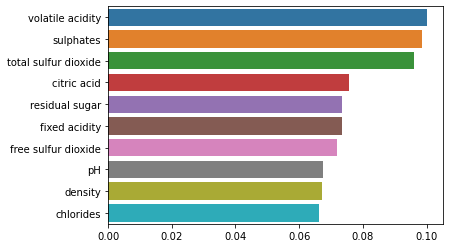

In [25]:
# Top 10 주요 변수 출력.
variable_importance = pd.Series(XGBC.feature_importances_, index = df.drop(columns=['quality']).columns)
top_variables_10 = variable_importance.sort_values(ascending=False)[1:11]# 0utliar alcohol 제거
sns.barplot(x=top_variables_10.values, y = top_variables_10.index, ci=None)
plt.show()

In [26]:
from IPython.lib.display import Audio

In [27]:
from IPython.lib.display import Audio
framerate = 4410
play_time_seconds = 3

t = np.linspace(0, play_time_seconds, framerate*play_time_seconds)
audio_data = np.sin(2*np.pi*300*t) + np.sin(2*np.pi*240*t)
Audio(audio_data, rate=framerate, autoplay=True)